# Road Line X Y Z

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

In [2]:
#img_result = cv2.imread(' img_result.jpg')

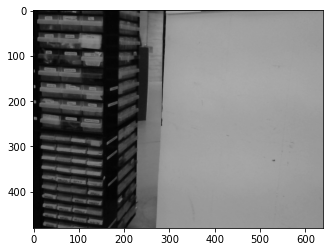

In [3]:
original_img= cv2.imread('img_result.jpg')
plt.imshow(original_img)

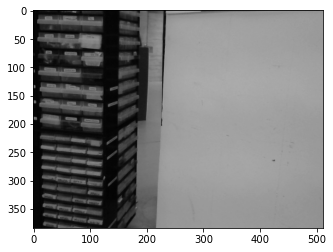

In [4]:
img = cv2.resize(original_img,None,fx=0.8, fy=0.8, interpolation = cv2.INTER_CUBIC)
plt.imshow(img)

In [5]:
img = cv2.GaussianBlur(img,(3,3),0)
img = cv2.GaussianBlur(img,(3,3),0)
edges = cv2.Canny(img, 50, 150, apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,118) #这里对最后一个参数使用了经验型的值

In [6]:
result = img.copy()
for line in lines:
    rho = line[0][0]  #第一个元素是距离rho
    theta= line[0][1] #第二个元素是角度theta
    print (rho)
    print (theta)
    if  (theta < (np.pi/4. )) or (theta > (3.*np.pi/4.0)): #垂直直线
        pt1 = (int(rho/np.cos(theta)),0)               #该直线与第一行的交点
        #该直线与最后一行的焦点
        pt2 = (int((rho-result.shape[0]*np.sin(theta))/np.cos(theta)),result.shape[0])
        cv2.line( result, pt1, pt2, (255))             # 绘制一条白线
    else:                                                  #水平直线
        pt1 = (0,int(rho/np.sin(theta)))               # 该直线与第一列的交点
        #该直线与最后一列的交点
        pt2 = (result.shape[1], int((rho-result.shape[1]*np.cos(theta))/np.sin(theta)))
        cv2.line(result, pt1, pt2, (255), 1)           # 绘制一条直线

236.0
0.05235988
229.0
0.017453292
231.0
0.034906585
234.0
0.034906585
187.0
0.017453292


In [7]:
cv2.imshow('Canny', edges )
cv2.waitKey(0)
cv2.destroyAllWindows()

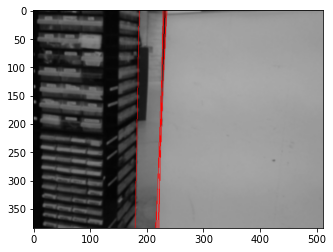

In [8]:
plt.imshow(result)

In [9]:
cv2.imshow('Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()